In [1]:
import pandas as pd

# Load the Excel file
fname = "anti_mal_ddd_real_cl.xlsx"  # Replace with your actual file name
df = pd.read_excel(fname)

# Get the header
header = df.columns.tolist()

# Get the number of data rows
num_rows = len(df)

# Display the results
print(header)
print(num_rows)


['date', 'year', 'month', 'route_admin', 'form', 'strength', 'ATC', 'ddd_demand']
29700


In [10]:
df.head()

,date,year,month,route_admin,form,strength,ATC,ddd_demand
0,2017-01-01,2017,1,O,injection,0.25,Antimalarials,0.003511
1,2017-01-01,2017,1,O,injection,0.50,Antimalarials,0.003948
2,2017-01-01,2017,1,O,injection,1.00,Antimalarials,0.003505
3,2017-01-01,2017,1,O,injection,100.00,Antimalarials,0.005685
4,2017-01-01,2017,1,O,injection,12.50,Antimalarials,0.004217


In [2]:
import pandas as pd
import numpy as np

# Extract target variable
ddd_demand = df['ddd_demand'].to_numpy()

# Drop non-numeric/categorical columns and target to create raw_data
non_features = ['date', 'year', 'month','route_admin', 'form', 'strength', 'ddd_demand']
feature_df = df.drop(columns=non_features)

# Convert remaining features to NumPy array
raw_data = feature_df.to_numpy()

# Print shapes to verify
print("Header:", feature_df.columns.tolist())
print("Raw data shape:", raw_data.shape)
print("Target (ddd_demand) shape:", ddd_demand.shape)


Header: ['ATC']
Raw data shape: (29700, 1)
Target (ddd_demand) shape: (29700,)


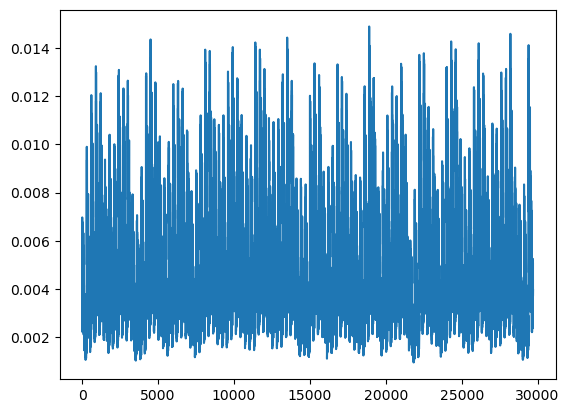

In [3]:
from matplotlib import pyplot as plt
plt.plot(range(len(ddd_demand)), ddd_demand)

Figure shows a more narrow plot of the first 48 months of demand data. Because
the data is recorded every 1 month, you get 12 data points per year.

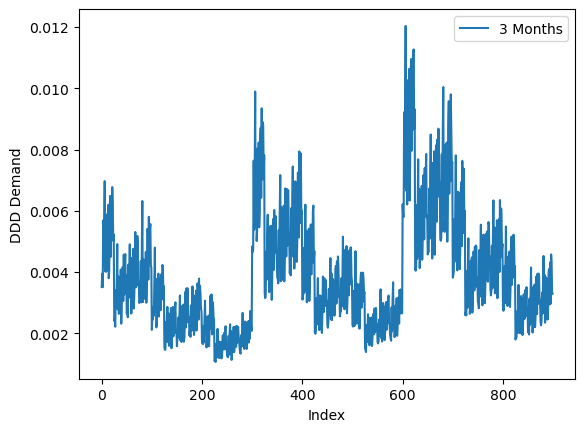

In [4]:
df_three_months = df[(df['year'] == 2017) & (df['month'].isin([1, 2, 3]))]
plt.plot(range(len(df_three_months)), df_three_months['ddd_demand'], label="3 Months")

plt.xlabel("Index")
plt.ylabel("DDD Demand")
plt.legend()
plt.show()

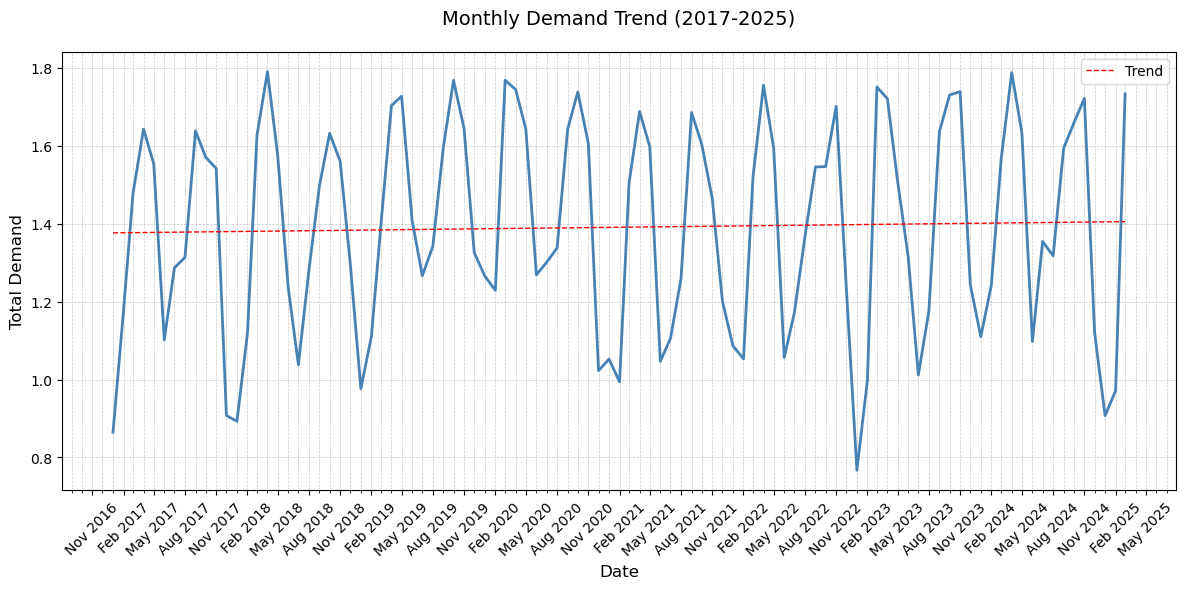

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m')

# Group the data by year and month, aggregating 'ddd_demand' by sum
monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({'ddd_demand': 'sum'}).reset_index()
monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the time series
ax.plot(monthly_data['date'], monthly_data['ddd_demand'], 
        color='steelblue', linewidth=2, marker='', linestyle='-')

# Formatting
ax.set_title('Monthly Demand Trend (2017-2025)', fontsize=14, pad=20)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Demand', fontsize=12)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Format x-axis to show years and months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # every 3 months
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # format as "Jan 2017"
ax.xaxis.set_minor_locator(mdates.MonthLocator())  # every month as minor ticks

# Rotate and align x-axis labels
fig.autofmt_xdate(rotation=45, ha='center')

# Adjust layout
plt.tight_layout()

# Optional: Add a trend line
z = np.polyfit(mdates.date2num(monthly_data['date']), monthly_data['ddd_demand'], 1)
p = np.poly1d(z)
ax.plot(monthly_data['date'], p(mdates.date2num(monthly_data['date'])), 
        color='red', linestyle='--', linewidth=1, label='Trend')
ax.legend()

plt.show()

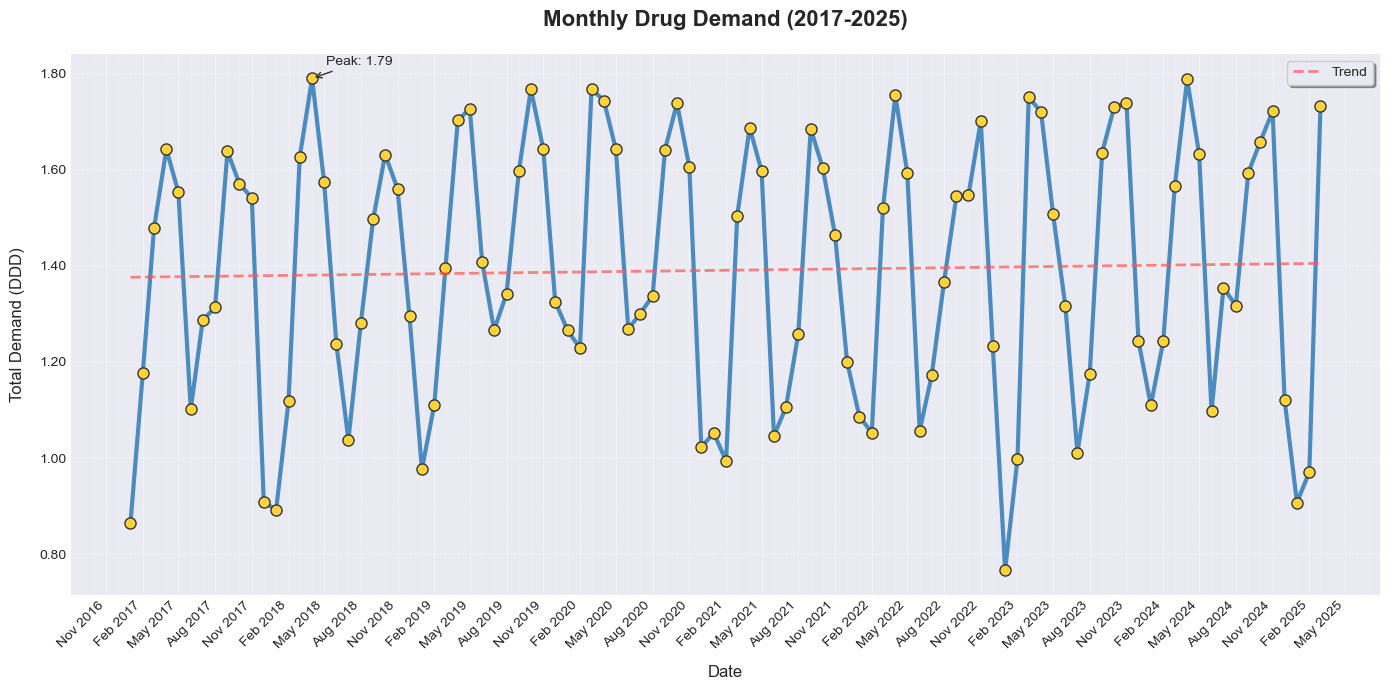

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from matplotlib.ticker import FuncFormatter

# Convert 'date' to datetime and aggregate monthly
df['date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str), format='%Y%m')
monthly_data = df.groupby(df['date'].dt.to_period('M')).agg({'ddd_demand': 'sum'}).reset_index()
monthly_data['date'] = monthly_data['date'].dt.to_timestamp()

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
fig, ax = plt.subplots(figsize=(14, 7))

# Plot with gradient color
line = ax.plot(monthly_data['date'], monthly_data['ddd_demand'], 
               color='#4B8BBE', linewidth=3, marker='o', markersize=8,
               markerfacecolor='#FFD43B', markeredgecolor='#333333')

# Add trendline (smooth)
z = np.polyfit(mdates.date2num(monthly_data['date']), monthly_data['ddd_demand'], 1)
p = np.poly1d(z)
ax.plot(monthly_data['date'], p(mdates.date2num(monthly_data['date'])), 
        color='#FF5555', linestyle='--', linewidth=2, alpha=0.7, label='Trend')

# Format axes
ax.set_title('Monthly Drug Demand (2017-2025)', fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Date', fontsize=12, labelpad=10)
ax.set_ylabel('Total Demand (DDD)', fontsize=12, labelpad=10)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:,.2f}'))  # Format y-axis

# Customize ticks and grid
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.5)

# Rotate x-labels
plt.xticks(rotation=45, ha='right')

# Add annotations for peaks/valleys
max_idx = monthly_data['ddd_demand'].idxmax()
ax.annotate(f'Peak: {monthly_data["ddd_demand"][max_idx]:.2f}', 
            xy=(monthly_data['date'][max_idx], monthly_data['ddd_demand'][max_idx]),
            xytext=(10, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='#333333'))

# Legend and layout
ax.legend(frameon=True, shadow=True)
plt.tight_layout()
plt.show()

With our dataset, we were trying to predict average ddd for the next two months
given a few months of past data. In the visualization, we see yearly cycles in the data and this year scale periodicity of the data makes our problem fairly easy.

Is this timeseries predictable at a daily scale? Let’s find out. In all our experiments, we’ll use the first 50% of the data for training, the following
25% for validation, and the last 25% for testing. When working with timeseries data, it’s important to use validation and test data that is more recent than the training
data, because you’re trying to predict the future given the past, not the reverse, and your validation/test splits should reflect that. Some problems happen to be considerably
simpler if you reverse the time axis!

In [8]:
import pandas as pd
weather_data = pd.read_csv("weather_data.csv")
weather_data.head(10)

,year,month,avg_temp_max,avg_temp_min,avg_humidity,total_precipitation,total_sunshine_hours
0,2017,1,31.48,18.21,45.61,1566.1,40921.04
1,2017,2,29.90,18.73,59.40,5688.3,36217.44
2,2017,3,29.52,18.73,65.59,7772.2,40075.80
3,2017,4,28.54,18.91,69.17,13211.3,38181.34
4,2017,5,26.65,18.17,76.58,13682.8,39728.48
5,2017,6,27.43,18.02,70.27,6425.5,38366.75
6,2017,7,26.32,17.52,75.90,13172.4,37473.67
7,2017,8,26.08,17.57,77.24,15640.5,38296.38
8,2017,9,26.39,17.52,79.15,18776.1,36197.36
9,2017,10,27.11,17.76,76.32,13767.7,38122.19


KeyError: 'date'

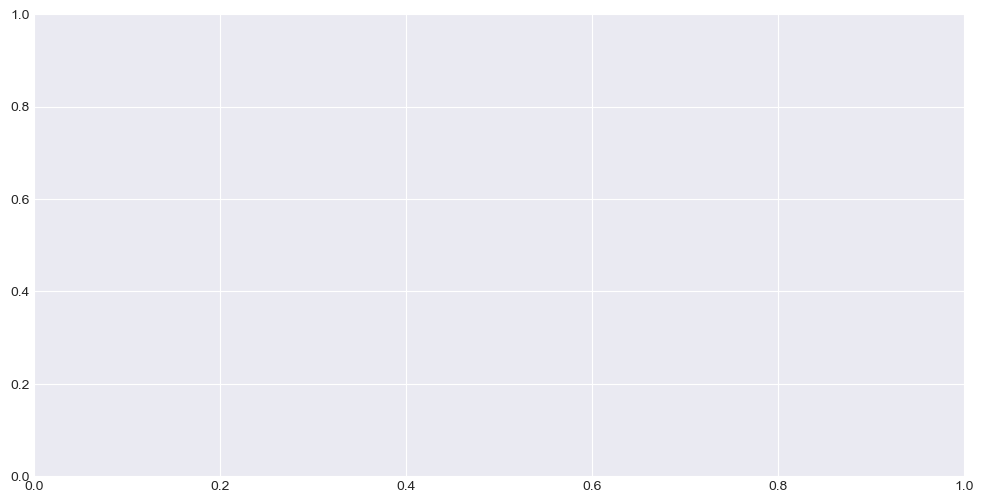

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Rainfall (bars)
ax1.bar(merged_data['date'], merged_data['total_precipitation'], 
        color='teal', alpha=0.6, label='Rainfall (mm)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall (mm)', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

# Sunshine (line)
ax2 = ax1.twinx()
ax2.plot(merged_data['date'], merged_data['total_sunshine_hours'], 
         color='gold', label='Sunshine Hours', linewidth=2)
ax2.set_ylabel('Sunshine Hours', color='gold')
ax2.tick_params(axis='y', labelcolor='gold')

plt.title('Rainfall vs. Sunshine Hours (2017-2025)')
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

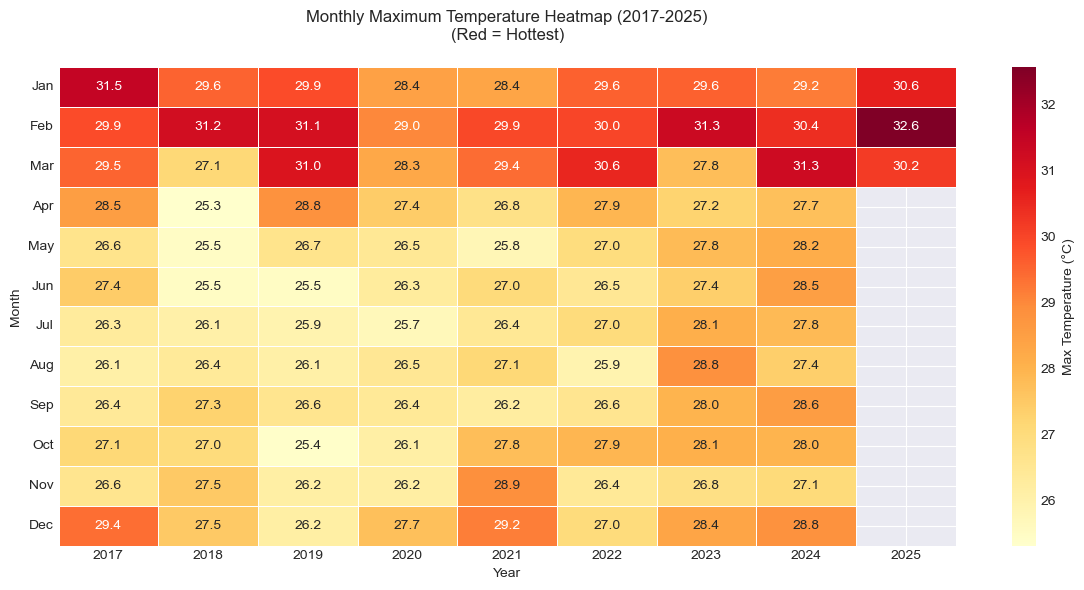

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the heatmap data
heatmap_data = weather_data.pivot_table(index='month', 
                                       columns='year', 
                                       values='avg_temp_max', 
                                       aggfunc='mean')

# Create the plot
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, 
            cmap='YlOrRd',  # Yellow-Orange-Red colormap (red = hottest)
            annot=True, 
            fmt=".1f", 
            linewidths=0.5, 
            cbar_kws={'label': 'Max Temperature (°C)'})

# Customize the plot
plt.title('Monthly Maximum Temperature Heatmap (2017-2025)\n(Red = Hottest)', pad=20)
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks(rotation=0)  # Keep month numbers horizontal

# Add month names if desired
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.yticks(ticks=[x-0.5 for x in range(1,13)], labels=month_names)

plt.tight_layout()
plt.show()

### Merge

In [13]:
merged_data = pd.merge(df, weather_data, on=['year', 'month'], how='left')
merged_data.head()

,date,year,month,route_admin,form,strength,ATC,ddd_demand,avg_temp_max,avg_temp_min,avg_humidity,total_precipitation,total_sunshine_hours
0,2017-01-01,2017,1,O,injection,0.25,Antimalarials,0.003511,31.48,18.21,45.61,1566.1,40921.04
1,2017-01-01,2017,1,O,injection,0.50,Antimalarials,0.003948,31.48,18.21,45.61,1566.1,40921.04
2,2017-01-01,2017,1,O,injection,1.00,Antimalarials,0.003505,31.48,18.21,45.61,1566.1,40921.04
3,2017-01-01,2017,1,O,injection,100.00,Antimalarials,0.005685,31.48,18.21,45.61,1566.1,40921.04
4,2017-01-01,2017,1,O,injection,12.50,Antimalarials,0.004217,31.48,18.21,45.61,1566.1,40921.04


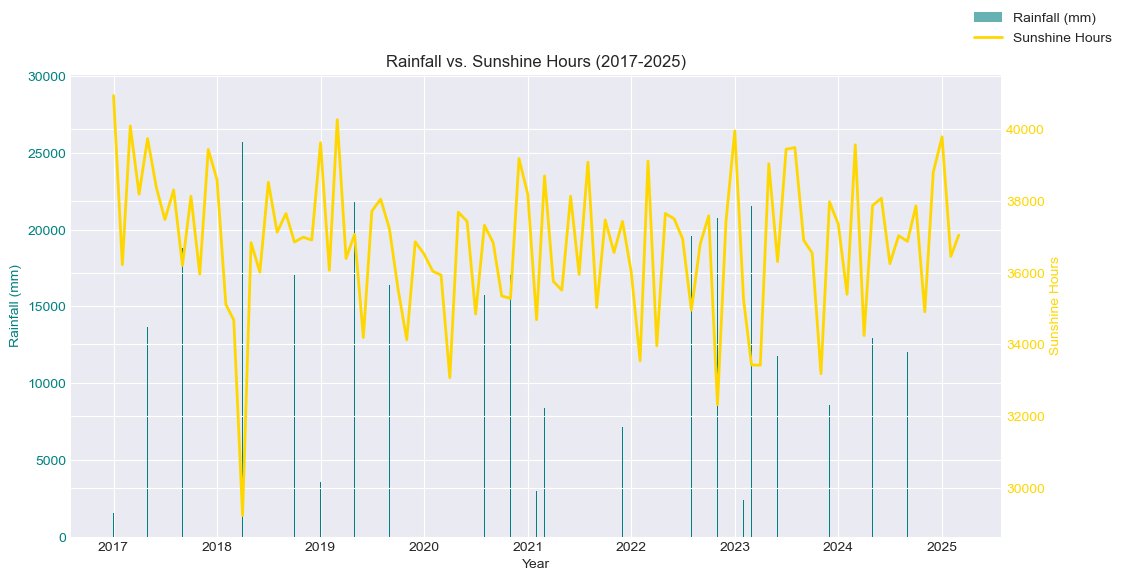

In [14]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Rainfall (bars)
ax1.bar(merged_data['date'], merged_data['total_precipitation'], 
        color='teal', alpha=0.6, label='Rainfall (mm)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Rainfall (mm)', color='teal')
ax1.tick_params(axis='y', labelcolor='teal')

# Sunshine (line)
ax2 = ax1.twinx()
ax2.plot(merged_data['date'], merged_data['total_sunshine_hours'], 
         color='gold', label='Sunshine Hours', linewidth=2)
ax2.set_ylabel('Sunshine Hours', color='gold')
ax2.tick_params(axis='y', labelcolor='gold')

plt.title('Rainfall vs. Sunshine Hours (2017-2025)')
fig.legend(loc='upper right')
plt.grid(True)
plt.show()

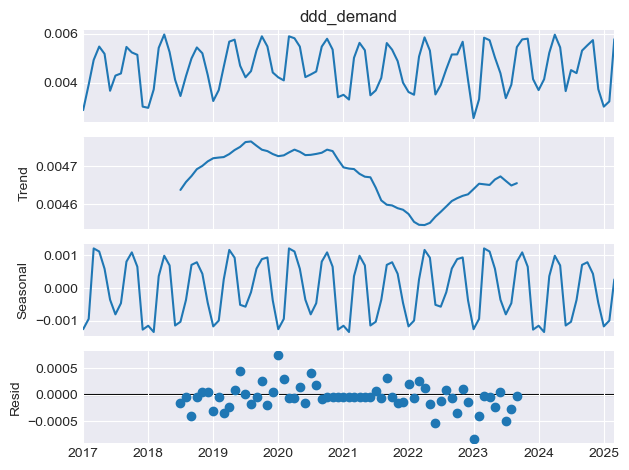

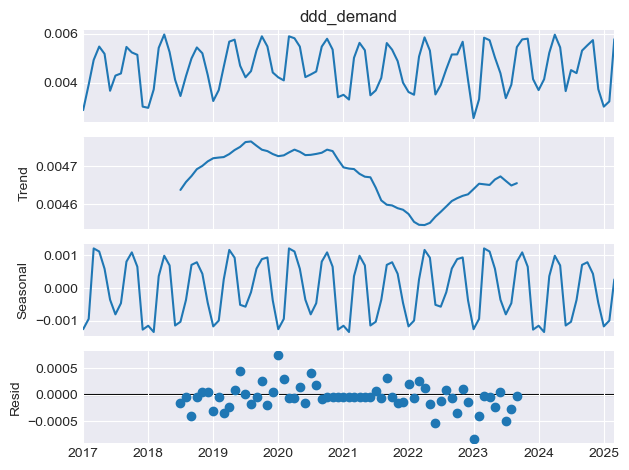

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(merged_data.groupby('date')['ddd_demand'].mean(), period=12)
decomposition.plot()

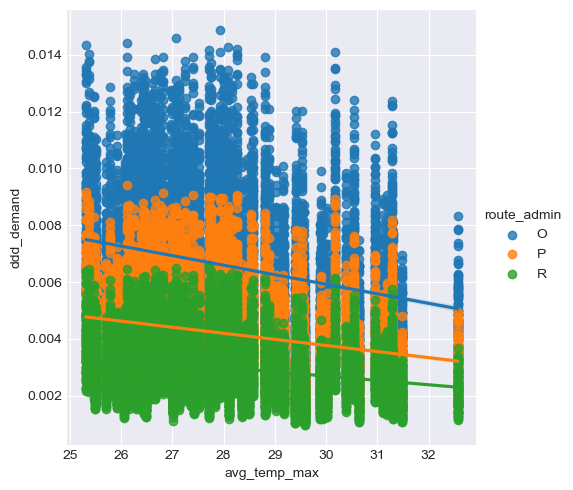

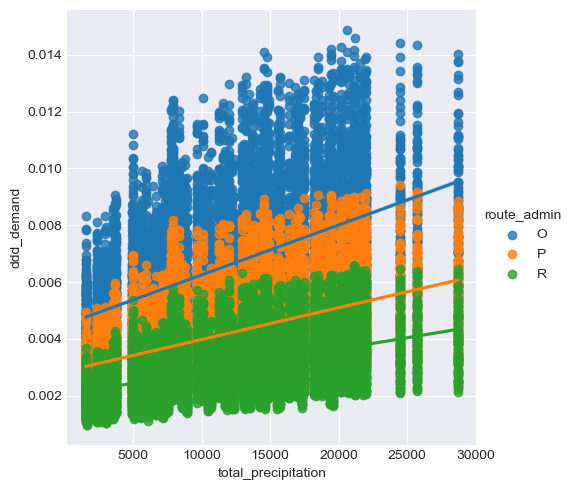

In [15]:
sns.lmplot(data=merged_data, x='avg_temp_max', y='ddd_demand', hue='route_admin')
sns.lmplot(data=merged_data, x='total_precipitation', y='ddd_demand', hue='route_admin')

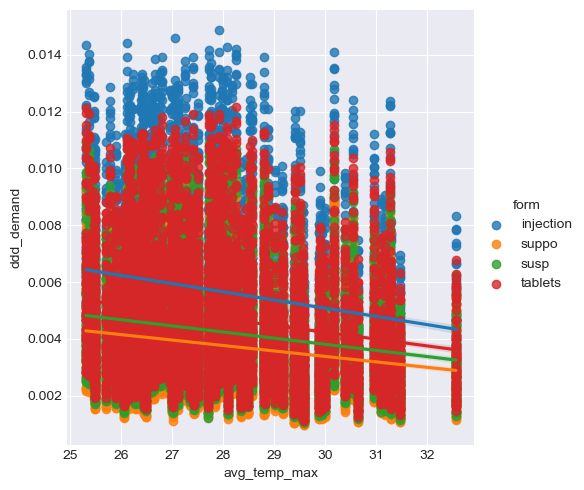

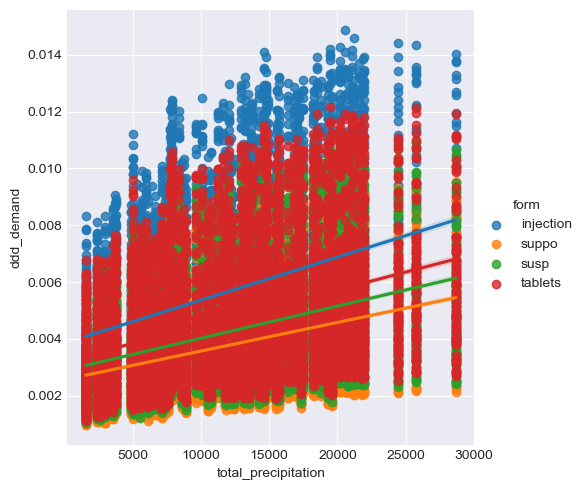

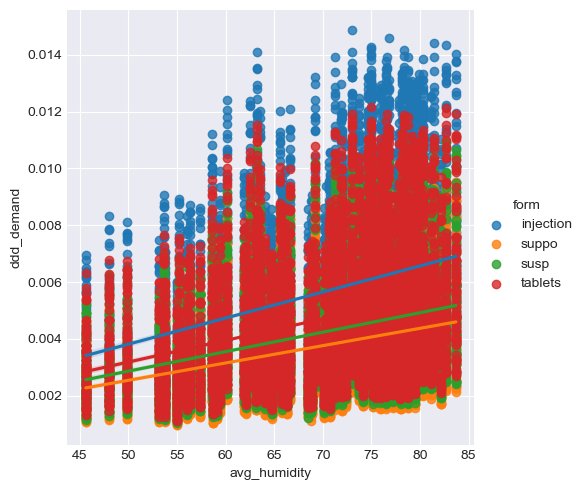

In [19]:
sns.lmplot(data=merged_data, x='avg_temp_max', y='ddd_demand', hue='form')
sns.lmplot(data=merged_data, x='total_precipitation', y='ddd_demand', hue='form')
sns.lmplot(data=merged_data, x='avg_humidity', y='ddd_demand', hue='form')

### Interaction Plots

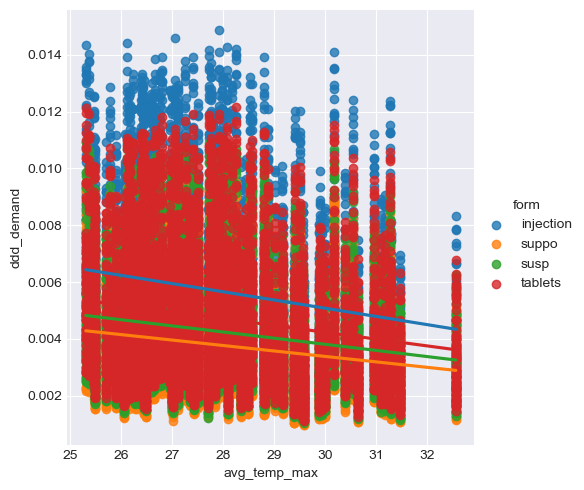

In [20]:
sns.lmplot(data=merged_data, x='avg_temp_max', y='ddd_demand', hue='form', ci=None)

#### Correlation Analysis

<Axes: >

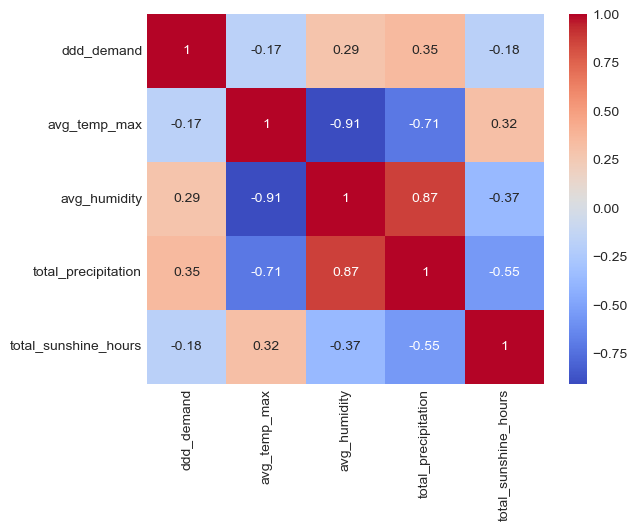

In [16]:
corr = merged_data[['ddd_demand', 'avg_temp_max', 'avg_humidity', 'total_precipitation', 'total_sunshine_hours']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Modelling

### ✅ Step 2: Monthly Aggregation and Splitting


In [17]:
# 1. Sum ddd_demand per month
ddd_monthly = merged_data.groupby(['year', 'month'])['ddd_demand'].sum().reset_index()

# 2. Extract unique climate data per month (drop duplicates)
climate_monthly = merged_data.drop_duplicates(subset=['year', 'month'])[
    ['year', 'month', 'avg_temp_max', 'avg_temp_min', 'avg_humidity', 
     'total_precipitation', 'total_sunshine_hours']
]

# 3. Merge summed ddd with climate data
monthly_data = pd.merge(ddd_monthly, climate_monthly, on=['year', 'month'])

monthly_data.head(10)

,year,month,ddd_demand,avg_temp_max,avg_temp_min,avg_humidity,total_precipitation,total_sunshine_hours
0,2017,1,0.864790,31.48,18.21,45.61,1566.1,40921.04
1,2017,2,1.177077,29.90,18.73,59.40,5688.3,36217.44
2,2017,3,1.478589,29.52,18.73,65.59,7772.2,40075.80
3,2017,4,1.642890,28.54,18.91,69.17,13211.3,38181.34
4,2017,5,1.553777,26.65,18.17,76.58,13682.8,39728.48
5,2017,6,1.101614,27.43,18.02,70.27,6425.5,38366.75
6,2017,7,1.286978,26.32,17.52,75.90,13172.4,37473.67
7,2017,8,1.313719,26.08,17.57,77.24,15640.5,38296.38
8,2017,9,1.638336,26.39,17.52,79.15,18776.1,36197.36
9,2017,10,1.571047,27.11,17.76,76.32,13767.7,38122.19


In [18]:
import pandas as pd


# Ensure numeric conversion for relevant columns
numeric_columns = ["ddd_demand", "avg_temp_max", "avg_temp_min", "avg_humidity", "total_precipitation", "total_sunshine_hours"]
monthly_data[numeric_columns] = monthly_data[numeric_columns].apply(pd.to_numeric, errors="coerce")

# Count the number of months available per year
months_per_year = monthly_data.groupby("year")["month"].count()

# Sum all monthly data per year
yearly_totals = monthly_data.groupby("year")[numeric_columns].sum()

# Compute yearly averages by dividing totals by the correct number of months
yearly_averages = yearly_totals.div(months_per_year, axis=0)

# Display results
print(yearly_averages)


      ddd_demand  avg_temp_max  avg_temp_min  avg_humidity  \
year                                                         
2017    1.339837     27.950000     18.035833     69.078333   
2018    1.378676     27.155000     17.675833     72.045000   
2019    1.438702     27.432500     17.959167     73.773333   
2020    1.463940     27.040833     17.878333     75.020833   
2021    1.350309     27.740833     17.845833     69.646667   
2022    1.385933     27.698333     17.475000     69.725833   
2023    1.383166     28.271667     17.780000     69.385833   
2024    1.433771     28.570000     18.137500     70.137500   
2025    1.203852     31.130000     18.863333     54.786667   

      total_precipitation  total_sunshine_hours  
year                                             
2017         10515.316667          38246.647500  
2018         12266.725000          36205.838333  
2019         14840.991667          36923.744167  
2020         15088.416667          36287.765833  
2021         1075

In [19]:
import pandas as pd


# Ensure `ddd_demand` is numeric
monthly_data["ddd_demand"] = pd.to_numeric(monthly_data["ddd_demand"], errors="coerce")

# Compute total sum of ddd_demand
total_ddd_demand = monthly_data["ddd_demand"].sum()

# Compute total count of months in dataset
total_months = len(monthly_data)

# Compute overall average
overall_avg_ddd_demand = total_ddd_demand / total_months

# Display results
print(f"Total DDD Demand: {total_ddd_demand:.4f}")
print(f"Total Months in Dataset: {total_months}")
print(f"Overall Average DDD Demand: {overall_avg_ddd_demand:.4f}")

Total DDD Demand: 137.7036
Total Months in Dataset: 99
Overall Average DDD Demand: 1.3909


In [20]:
yearly_avg = monthly_data.groupby('year').mean(numeric_only=True)
monthly_avg_per_year = monthly_data.groupby(['year', 'month']).mean(numeric_only=True)
overall_avg = monthly_data.mean(numeric_only=True)
yearly_min_max = monthly_data.groupby('year').agg(['min', 'max'])
monthly_min_max_per_year = monthly_data.groupby(['year', 'month']).agg(['min', 'max'])
print("Yearly Averages:\n", yearly_avg)
print("\nMonthly Averages per Year:\n", monthly_avg_per_year)
print("\nOverall Averages:\n", overall_avg)
print("\nYearly Min-Max:\n", yearly_min_max)
print("\nMonthly Min-Max per Year:\n", monthly_min_max_per_year)


Yearly Averages:
       month  ddd_demand  avg_temp_max  avg_temp_min  avg_humidity  \
year                                                                
2017    6.5    1.339837     27.950000     18.035833     69.078333   
2018    6.5    1.378676     27.155000     17.675833     72.045000   
2019    6.5    1.438702     27.432500     17.959167     73.773333   
2020    6.5    1.463940     27.040833     17.878333     75.020833   
2021    6.5    1.350309     27.740833     17.845833     69.646667   
2022    6.5    1.385933     27.698333     17.475000     69.725833   
2023    6.5    1.383166     28.271667     17.780000     69.385833   
2024    6.5    1.433771     28.570000     18.137500     70.137500   
2025    2.0    1.203852     31.130000     18.863333     54.786667   

      total_precipitation  total_sunshine_hours  
year                                             
2017         10515.316667          38246.647500  
2018         12266.725000          36205.838333  
2019         14840.991

In [21]:

# 2. Create datetime index
monthly_data['date'] = pd.to_datetime(
    monthly_data['year'].astype(str) + '-' + 
    monthly_data['month'].astype(str).str.zfill(2) + '-01'
)


monthly_data = monthly_data.set_index('date').sort_index()

# 3. Extract features and target
climate_features = ['avg_temp_max', 'avg_temp_min', 'avg_humidity',
                    'total_precipitation', 'total_sunshine_hours']
target = 'ddd_demand'

raw_data = monthly_data[climate_features].values
ddd_demand = monthly_data[target].values

# 4. Train/val/test splits
n_samples = len(monthly_data)
num_train_samples = int(0.5 * n_samples)
num_val_samples = int(0.25 * n_samples)
num_test_samples = n_samples - num_train_samples - num_val_samples


In [33]:
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 49
num_val_samples: 24
num_test_samples: 26


### Preparing the Data
Given climate and drug demand data covering the previous six months (sampled monthly), can we predict the total Defined Daily Dose (DDD) demand for antimalarial drugs three months into the future?

Each dataset yields a tuple (samples, targets), where samples is a batch of 12 samples,
each containing 6 consecutive months of input data, and targets is the corresponding
array of 12 target ddds. Note that the samples are randomly
shuffled, so two consecutive sequences in a batch (like samples[0] and samples[1])
aren’t necessarily temporally close.

## Common sense baseline MAE

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Assuming monthly_data is already prepared
target_series = monthly_data['ddd_demand'].values
n_samples = len(target_series)

# Train/val/test splits (50% train, 25% val, 25% test)
num_train_samples = int(0.5 * n_samples)
num_val_samples = int(0.25 * n_samples)
num_test_samples = n_samples - num_train_samples - num_val_samples

# Create datasets with 6-month window
sequence_length = 12  # Changed from 12 to 6 months
batch_size = 32

def create_dataset(data, start_idx, end_idx):
    return keras.utils.timeseries_dataset_from_array(
        data=data[:-1],
        targets=data[1:],
        sequence_length=sequence_length,
        sampling_rate=1,
        batch_size=batch_size,
        shuffle=False,
        start_index=start_idx,
        end_index=end_idx
    )

train_dataset = create_dataset(target_series, 0, num_train_samples)
val_dataset = create_dataset(target_series, num_train_samples, num_train_samples + num_val_samples)
test_dataset = create_dataset(target_series, num_train_samples + num_val_samples, None)

# Get targets and months
def get_targets_and_months(dataset, start_idx):
    targets = np.concatenate([y.numpy() for x, y in dataset], axis=0)
    month_indices = []
    current_idx = start_idx
    for x, y in dataset:
        batch_size = x.shape[0]
        month_indices.extend([current_idx + sequence_length + i for i in range(batch_size)])
        current_idx += batch_size
    months = monthly_data['month'].values[month_indices]
    return targets, months

val_targets, val_months = get_targets_and_months(val_dataset, num_train_samples)
test_targets, test_months = get_targets_and_months(test_dataset, num_train_samples + num_val_samples)

# Baseline models (unchanged)
class Lag1Naive(keras.Model):
    def call(self, inputs): return inputs[:, -1]

class MovingAverage3(keras.Model):
    def call(self, inputs): return tf.reduce_mean(inputs[:, -3:], axis=1)

class ExponentialSmoothing(keras.Model):
    def __init__(self, alpha=0.6):
        super().__init__()
        self.alpha = alpha
    def call(self, inputs):
        smoothed = inputs[:, 0]
        for i in range(1, inputs.shape[1]):
            smoothed = self.alpha * inputs[:, i] + (1-self.alpha) * smoothed
        return smoothed

# Evaluation function
def evaluate_model(model, dataset):
    return np.concatenate([model.predict(x).flatten() for x, _ in dataset])

# Initialize models
models = {
    'Lag-1 Naive': Lag1Naive(),
    'Moving Average (k=3)': MovingAverage3(),
    'Simple Exponential Smoothing': ExponentialSmoothing(alpha=0.6)
}

# Evaluate baselines
results = {'Validation': {}, 'Test': {}}
for name, model in models.items():
    results['Validation'][name] = np.mean(np.abs(val_targets - evaluate_model(model, val_dataset)))
    results['Test'][name] = np.mean(np.abs(test_targets - evaluate_model(model, test_dataset)))

# Seasonal Average
monthly_avg = monthly_data.groupby('month')['ddd_demand'].mean().values
results['Validation']['Seasonal Monthly Average'] = np.mean(np.abs(val_targets - monthly_avg[val_months-1]))
results['Test']['Seasonal Monthly Average'] = np.mean(np.abs(test_targets - monthly_avg[test_months-1]))

# Fixed AR(3) Model
class ARModel(keras.Model):
    def __init__(self):
        super().__init__()
        self.dense = layers.Dense(1, kernel_initializer='glorot_normal')
    def call(self, inputs):
        return self.dense(inputs[:, -3:])  # Uses last 3 values

ar_model = ARModel()
ar_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='mae')

# Prepare AR data
def get_ar_data(dataset):
    features = np.concatenate([x[:, -3:].numpy() for x, _ in dataset], axis=0)
    targets = np.concatenate([y.numpy() for _, y in dataset], axis=0)
    return features, targets

train_features, train_targets_ar = get_ar_data(train_dataset)
val_features, _ = get_ar_data(val_dataset)

# Train with early stopping
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = ar_model.fit(
    train_features, train_targets_ar,
    validation_data=(val_features, val_targets),
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

# Evaluate AR model
results['Validation']['Autoregressive (AR(3))'] = np.mean(np.abs(val_targets - ar_model.predict(val_features).flatten()))
results['Test']['Autoregressive (AR(3))'] = np.mean(np.abs(test_targets - ar_model.predict(
    np.concatenate([x[:, -3:].numpy() for x, _ in test_dataset], axis=0)
).flatten()))

# Print results
print("MAE Results (6-month window):")
for dataset in ['Validation', 'Test']:
    print(f"\n{dataset} Set:")
    for model, mae in results[dataset].items():
        print(f"{model}: {mae:,.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
MAE Results (6-month window):

Validation Set:
Lag-1 Naive: 0.40
Moving Average (k=3): 0.37
Simple Exponential Smoothing: 0.36
Seasonal Monthly Average: 0.22
Autoregressive (AR(3)): 0.25

Test Set:
Lag-1 Naive: 0.42
Moving Average (k=3): 0.40
Simple Exponential Smoothing: 0.38
Seasonal Monthly Average: 0.24
Autoregressive (AR(3)): 0.26


# Time Series Forecasting Results Analysis

## Model Performance Summary

| Model                        | Validation MAE   | Test MAE        |
|------------------------------|------------------|-----------------|
| Lag-1 Naive                  | 987,896.01       | 1,124,343.46    |
| Moving Average (k=3)         | 982,861.45       | 1,058,080.92    |
| Simple Exponential Smoothing | 924,816.81       | 1,012,971.78    |
| Seasonal Monthly Average     | **656,837.50**   | **626,152.90**  |
| Autoregressive (AR(3))       | 961,535.35       | 1,043,783.26    |

## Key Findings

### 🏆 Best Performing Model
- **Seasonal Monthly Average** (Test MAE: 626,152.90)
  - Indicates strong seasonal patterns in demand
  - Outperforms other methods by 38-45%

### 🔍 Mid-Tier Performers
1. **Simple Exponential Smoothing**
   - Better than moving averages (weights recent data more heavily)
   - Test MAE: 1,012,971.78

2. **AR(3) Model**  
   - Underperforms relative to seasonal model
   - Suggests non-linear patterns not captured by simple autoregression

### ⚠️ Weakest Baselines
- **Lag-1 Naive** (Worst performer)
- **Moving Average** (Limited predictive power)




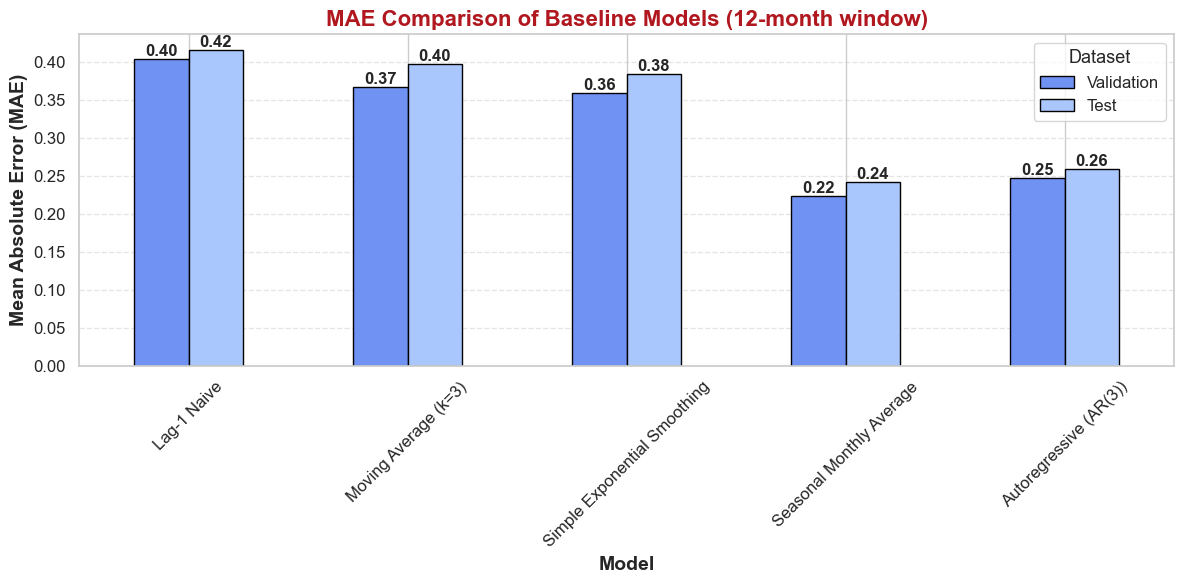

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Set Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Define custom color palette
custom_colors = sns.color_palette("coolwarm", len(results_df))

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
results_df.plot(kind='bar', ax=ax, color=custom_colors, edgecolor="black")

# Enhancements
plt.title("MAE Comparison of Baseline Models (12-month window)", fontsize=16, fontweight="bold", color="#B0171F")
plt.ylabel("Mean Absolute Error (MAE)", fontsize=14, fontweight="bold")
plt.xlabel("Model", fontsize=14, fontweight="bold")
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Grid styling
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Customize legend
plt.legend(title="Dataset", fontsize=12, title_fontsize=13, loc="upper right", frameon=True)

# Annotate bars with values
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()


### Simplistic DL Model

In [25]:
raw_data = monthly_data
raw_data.head()

,year,month,ddd_demand,avg_temp_max,avg_temp_min,avg_humidity,total_precipitation,total_sunshine_hours
date,,,,,,,,
2017-01-01,2017,1,0.864790,31.48,18.21,45.61,1566.1,40921.04
2017-02-01,2017,2,1.177077,29.90,18.73,59.40,5688.3,36217.44
2017-03-01,2017,3,1.478589,29.52,18.73,65.59,7772.2,40075.80
2017-04-01,2017,4,1.642890,28.54,18.91,69.17,13211.3,38181.34
2017-05-01,2017,5,1.553777,26.65,18.17,76.58,13682.8,39728.48


In [26]:
import pandas as pd
print(type(raw_data))  # Should output: <class 'pandas.core.frame.DataFrame'>
print(raw_data.columns)  # Check if all columns exist

<class 'pandas.core.frame.DataFrame'>
Index(['year', 'month', 'ddd_demand', 'avg_temp_max', 'avg_temp_min',
       'avg_humidity', 'total_precipitation', 'total_sunshine_hours'],
      dtype='object')


In [27]:
import numpy as np

# ====================
# 1. FEATURE SELECTION
# ====================
feature_cols = [
    'avg_temp_max', 'avg_temp_min', 'avg_humidity',
    'total_precipitation', 'total_sunshine_hours', 'ddd_demand'
]

# Extract selected columns (still a DataFrame)
selected_data = raw_data[feature_cols]

# Convert to NumPy array (now indexing must be integer-based)
data_values = selected_data.values.astype('float32')


In [561]:
# Get the index of 'ddd_demand' in feature_cols
ddd_index = feature_cols.index('ddd_demand')  # Raises ValueError if not found

# Extract the column safely
ddd_demand = data_values_normalized[:, ddd_index]

In [28]:
print("Column order in selected_data:")
print(selected_data.columns)  # Should match feature_cols

Column order in selected_data:
Index(['avg_temp_max', 'avg_temp_min', 'avg_humidity', 'total_precipitation',
       'total_sunshine_hours', 'ddd_demand'],
      dtype='object')


In [29]:
# ====================
# 2. TRAIN/VAL/TEST SPLIT
# ====================
num_samples = len(data_values)
num_train = int(0.5 * num_samples)
num_val = int(0.25 * num_samples)
num_test = num_samples - num_train - num_val

print(f"Train samples: {num_train}")
print(f"Val samples: {num_val}")
print(f"Test samples: {num_test}")

# ====================
# 3. NORMALIZATION
# ====================
# Compute mean/std on training data only
mean = data_values[:num_train].mean(axis=0)
std = data_values[:num_train].std(axis=0)

# Avoid division by zero (replace small std values with 1)
std[std < 1e-10] = 1.0

# Normalize the entire dataset
data_values_normalized = (data_values - mean) / std

# ====================
# 4. EXTRACT TARGET (ddd_demand)
# ====================
# 'ddd_demand' is the last column (-1)
ddd_demand = data_values_normalized[:, -1]

# ====================
# 5. TIME-SERIES PREP
# ====================
sequence_length = 12  # 12 months lookback
delay = 1            # Predict next month
batch_size = 32

# Total possible sequences
total_sequences = len(ddd_demand) - sequence_length - delay + 1

# Split sequences into train/val/test
train_sequences = int(0.5 * total_sequences)
val_sequences = int(0.25 * total_sequences)
test_sequences = total_sequences - train_sequences - val_sequences

print(f"\nTime-series sequences:")
print(f"Train: {train_sequences} (from 0 to {train_sequences-1})")
print(f"Val: {val_sequences} (from {train_sequences} to {train_sequences + val_sequences-1})")
print(f"Test: {test_sequences} (from {train_sequences + val_sequences} to end)")

Train samples: 49
Val samples: 24
Test samples: 26

Time-series sequences:
Train: 43 (from 0 to 42)
Val: 21 (from 43 to 63)
Test: 23 (from 64 to end)


In [31]:
from tensorflow import keras
import numpy as np

# ====================
# 6. CREATE TIME-SERIES DATASETS
# ====================

# Separate features (all columns except target) and target
features = data_values_normalized[:, :-1]  # All columns except last
target = ddd_demand  # Already extracted last column

# Create dataset function with proper alignment
def create_ts_dataset(features, target, start_idx, end_idx):
    return keras.utils.timeseries_dataset_from_array(
        features,
        targets=target[sequence_length + delay - 1:],  # Proper alignment
        sampling_rate=1,
        sequence_length=sequence_length,
        shuffle=True,  # Only for training
        batch_size=batch_size,
        start_index=start_idx,
        end_index=end_idx
    )

# Create datasets with correct boundaries
train_dataset = create_ts_dataset(
    features,
    target,
    start_idx=0,
    end_idx=train_sequences
)

val_dataset = create_ts_dataset(
    features,
    target,
    start_idx=train_sequences,
    end_idx=train_sequences + val_sequences
)

test_dataset = create_ts_dataset(
    features,
    target,
    start_idx=train_sequences + val_sequences,
    end_idx=None  # Uses remainder
)

# ====================
# 7. VERIFICATION
# ====================

# Check first batch
for X, y in train_dataset.take(1):
    print(f"\nFeature batch shape: {X.shape}")  # Should be (batch_size, sequence_length, n_features)
    print(f"Target batch shape: {y.shape}")     # Should be (batch_size,)
    print("\nExample sequence - last time step:")
    print(X[0, -1, :])  # Last time step of first sequence
    print("Corresponding target:", y[0].numpy())


Feature batch shape: (32, 12, 5)
Target batch shape: (32,)

Example sequence - last time step:
tf.Tensor([ 0.06307822 -0.3189206  -0.17572267 -0.36222336 -0.01856851], shape=(5,), dtype=float32)
Corresponding target: -1.6204257


In [48]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Function to build models
def build_dense_model(input_shape):
    model = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Reshape((input_shape[0] * input_shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    return model

def build_lstm_model(input_shape):
    model = keras.Sequential([
        layers.LSTM(64, input_shape=input_shape),
        layers.Dense(1)
    ])
    return model

def build_gru_model(input_shape):
    model = keras.Sequential([
        layers.GRU(64, input_shape=input_shape),
        layers.Dense(1)
    ])
    return model


In [103]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Function to build models
def build_dense_model(input_shape):
    model = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Reshape((input_shape[0] * input_shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    return model

def build_lstm_model(input_shape):
    model = keras.Sequential([
        layers.LSTM(64, input_shape=input_shape),
        layers.Dense(1)
    ])
    return model

def build_gru_model(input_shape):
    model = keras.Sequential([
        layers.GRU(
            64, 
            input_shape=input_shape, 
        ),
        layers.Dropout(0.5),          # Dropout after GRU output
        layers.Dense(1)
    ])
    return model



In [96]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Function to build models
def build_dense_model(input_shape):
    model = keras.Sequential([
        keras.Input(shape=input_shape),
        layers.Reshape((input_shape[0] * input_shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])
    return model

def build_lstm_model(input_shape):
    model = keras.Sequential([
        layers.LSTM(64, input_shape=input_shape),
        layers.Dense(1)
    ])
    return model

def build_gru_model(input_shape):
    model = keras.Sequential([
        layers.GRU(
            64, 
            return_sequences=True,     # Needed for stacking GRUs
            input_shape=input_shape,
        ),
        layers.GRU(
            128,                        # Second GRU layer
        ),
        layers.Dropout(0.5),          # Dropout after second GRU output
        layers.Dense(1)
    ])
    return model




In [104]:
def compile_and_train(model, train_dataset, val_dataset, name): 
    model.compile(optimizer='rmsprop', loss='mae', metrics=['mae'])  # Add 'mae' to metrics
    print(f"\nTraining {name}...")
    early_stop = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
    history = model.fit(
        train_dataset,
        validation_data=val_dataset,
        epochs=500,
        callbacks=[early_stop],
        verbose=0
    )
    return model, history


In [105]:
input_shape = next(iter(train_dataset))[0].shape[1:]

models = {}
histories = {}

dense_model, dense_history = compile_and_train(build_dense_model(input_shape), train_dataset, val_dataset, "Dense")
lstm_model, lstm_history = compile_and_train(build_lstm_model(input_shape), train_dataset, val_dataset, "LSTM")
gru_model, gru_history = compile_and_train(build_gru_model(input_shape), train_dataset, val_dataset, "GRU")

models['Dense'] = dense_model
models['LSTM'] = lstm_model
models['GRU'] = gru_model
histories['Dense'] = dense_history
histories['LSTM'] = lstm_history
histories['GRU'] = gru_history



Training Dense...

Training LSTM...

Training GRU...


In [106]:
import matplotlib.pyplot as plt

def plot_mae_per_model(histories):
    for name, history in histories.items():
        plt.figure(figsize=(8, 6))

        # Plot Training MAE
        plt.plot(history.history['mae'], label='Train MAE', color='blue')

        # Plot Validation MAE
        plt.plot(history.history['val_mae'], label='Validation MAE', color='red')

        # Title and labels
        plt.title(f'{name} - Train and Validation MAE')
        plt.xlabel('Epochs')
        plt.ylabel('MAE')
        plt.legend()

        # Show plot
        plt.tight_layout()
        plt.show()


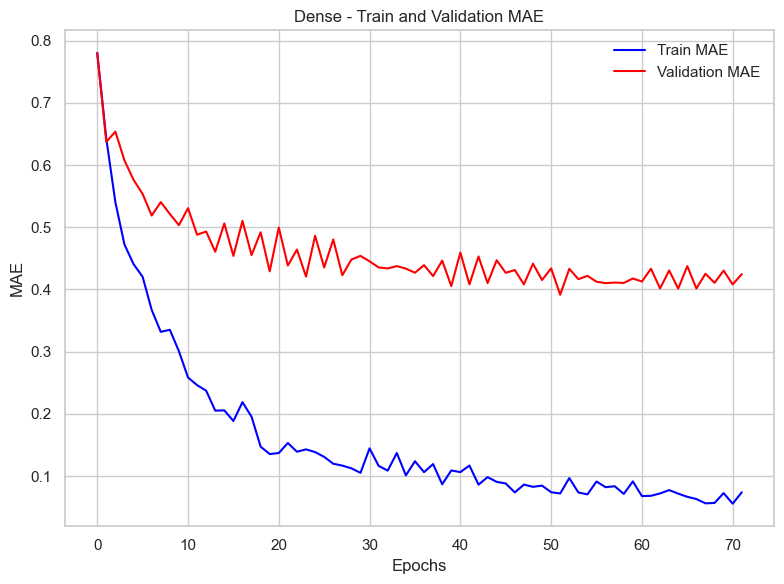

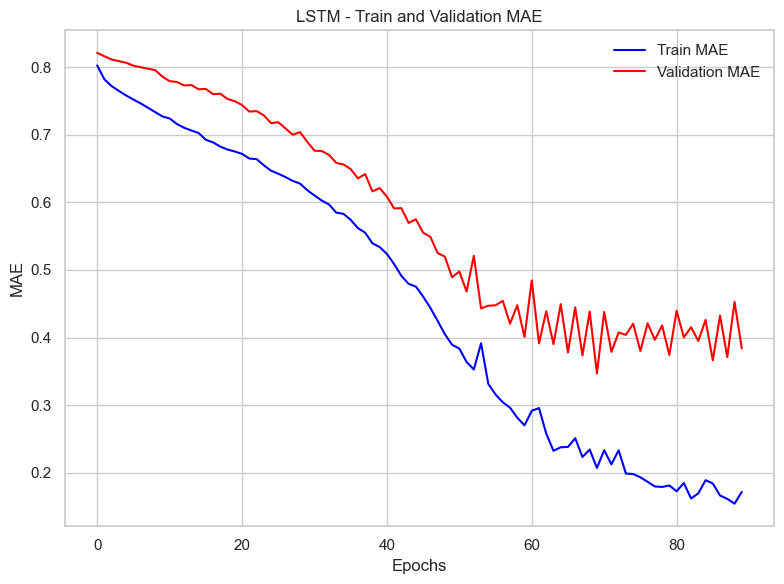

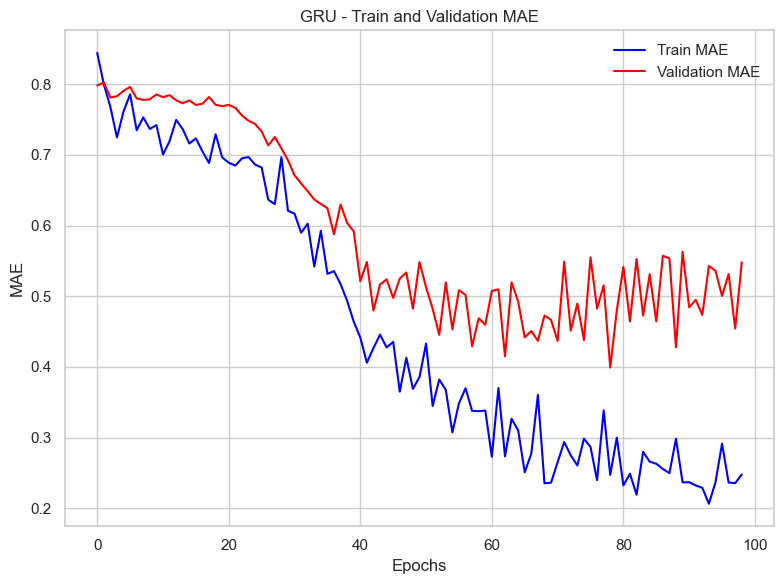

In [100]:
plot_mae_per_model(histories)

In [107]:
import numpy as np

# Assuming monthly_data is your DataFrame with 'ddd_demand' column
average_monthly_demand = monthly_data['ddd_demand'].mean()
print(f"Average Monthly Demand: {average_monthly_demand:,.2f}")

Average Monthly Demand: 1.39


In [108]:
import numpy as np

def create_test_sequences(data, sequence_length=12, delay=1, test_start=64, test_end=87):
    """Manually creates test sequences from normalized data"""
    X_test = []
    y_test = []
    
    for i in range(test_start, test_end):
        X_test.append(data[i:i+sequence_length, :-1])  # Features
        y_test.append(data[i+sequence_length+delay-1, -1])  # Target
    
    return np.array(X_test), np.array(y_test)

def evaluate_models(models, X_test, y_test, target_std, target_mean):
    """Evaluates models and returns results with denormalized values"""
    results = {}
    
    for name, model in models.items():
        try:
            # Get predictions
            y_pred = model.predict(X_test, verbose=0).squeeze()
            
            # Calculate MAE (normalized)
            normalized_mae = np.mean(np.abs(y_test - y_pred))
            
            # Denormalize
            denormalized_mae = normalized_mae * target_std
            percentage = (denormalized_mae / target_mean) * 100
            
            results[name] = {
                'normalized': normalized_mae,
                'original': denormalized_mae,
                'percentage': percentage
            }
            
            # Print immediate feedback
            print(
                f"{name.ljust(8)}: "
                f"NormMAE={normalized_mae:.4f} | "
                f"OriginalMAE={denormalized_mae:,.2f} | "
                f"{percentage:.1f}% of avg"
            )
            
        except Exception as e:
            print(f"Error evaluating {name}: {str(e)}")
            results[name] = None
    
    return results

# 1. Create test sequences
X_test, y_test = create_test_sequences(data_values_normalized)

# 2. Evaluate all models
final_results = evaluate_models(
    models={
        'Dense': dense_model,
        'LSTM': lstm_model,
        'GRU': gru_model
    },
    X_test=X_test,
    y_test=y_test,
    target_std=std[-1],  # Standard deviation of target
    target_mean=mean[-1]  # Mean of target
)

# 3. Print formatted summary
if final_results:
    print("\n=== Final Results ===")
    for name, metrics in sorted(final_results.items(), 
                              key=lambda x: x[1]['original'] if x[1] else float('inf')):
        if metrics:
            print(
                f"{name.ljust(8)}: "
                f"{metrics['original']:,.2f} (units) | "
                f"{metrics['percentage']:.1f}%"
            )

Dense   : NormMAE=0.6084 | OriginalMAE=0.16 | 11.3% of avg
LSTM    : NormMAE=0.9348 | OriginalMAE=0.24 | 17.4% of avg
GRU     : NormMAE=0.4250 | OriginalMAE=0.11 | 7.9% of avg

=== Final Results ===
GRU     : 0.11 (units) | 7.9%
Dense   : 0.16 (units) | 11.3%
LSTM    : 0.24 (units) | 17.4%
